# Task 2: Predictive Modeling with Aviation Dataset




## Problem Statement

Predicting the Injury Severity in ariline accidents

#### Columns/Features:

1. Event.Id
2. Investigation.Type
3. Accident.Number
4. Event.Date
5. Location
6. Country
7. Latitude
8. Longitude
9. Airport.Code
10. Airport.Name
11. Injury.Severity
12. Aircraft.damage
13. Aircraft.Category
14. Registration.Number
15. Make
16. Model
17. Amateur.Built
18. Number.of.Engines
19. Engine.Type
20. FAR.Description
21. Schedule
22. Purpose.of.flight
23. Air.carrier
24. Total.Fatal.Injuries
25. Total.Serious.Injuries
26. Total.Minor.Injuries
27. Total.Uninjured
28. Weather.Condition
29. Broad.phase.of.flight
30. Report.Status
31. Publication.Date


#### Importing Packages

In [272]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [273]:
from sklearn.preprocessing import LabelEncoder

In [274]:
pd.set_option('display.max_columns', None)

In [275]:
file_path = '/home/supriya/Desktop/FDV/aviation_prediction/AviationData.csv'

In [276]:
data = pd.read_csv(file_path, encoding='latin1')

/tmp/ipykernel_9824/2604165213.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='latin1')


In [277]:
data.sample(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
67047,20090826X92257,Accident,ERA09CA482,2009-08-24,"Gumboro Township, DE",United States,384745N,0753633W,NaN,NaN,Non-Fatal,Substantial,Helicopter,N98KR,BELL,206,N,1.0,Turbo Shaft,137,NaN,Aerial Application,Helicopter Applicators Inc,0.0,0.0,0.0,1.0,VMC,NaN,The pilots failure to secure the flight contr...,25-09-2020
79840,20170508X85232,Accident,DCA17CA111,2017-05-02,"Boston, MA",United States,421236N,0007100W,NaN,NaN,Non-Fatal,NaN,Airplane,N595JB,AIRBUS,A320 232,N,2.0,Turbo Fan,121,SCHD,NaN,jetBlue Airways,0.0,0.0,1.0,154.0,VMC,NaN,an inadvertent encounter with convective turbu...,25-09-2020
30159,20001211X14396,Accident,CHI92LA124,1992-04-08,"GARNAVILLO, IA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N92088,Maule,M-7-235,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,23-07-1993
10501,20001214X41828,Accident,LAX85LA075,1984-12-16,"OCEANO, CA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N137TW,Beech,V35B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,NaN
45117,20001211X11290,Accident,LAX99LA011,1998-10-17,"SHELTER COVE, CA",United States,NaN,NaN,OQ5,SHELTER COVE,Fatal(3),Destroyed,NaN,N6870F,Piper,PA-28-181,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,21-06-2000
81979,20180724X30725,Accident,WPR18LA206,2018-07-24,"Oakdale, CA",United States,374754N,1204320W,NaN,NaN,Non-Fatal,Substantial,Helicopter,N107CH,Bell,UH 1H,N,NaN,Turbo Shaft,091,NaN,Ferry,NaN,0.0,1.0,0.0,1.0,VMC,NaN,The pilot's loss of control during a precautio...,19-11-2020
13275,20001214X38075,Accident,MIA86FA014,1985-10-18,"FT.LAUDERDALE, FL",United States,NaN,NaN,fxe,FT LAUDERDALE,Non-Fatal,Substantial,NaN,N657WM,Cessna,421C,No,2.0,Reciprocating,NaN,NSCH,Unknown,"Aircraft Charters,inc.",0.0,0.0,2.0,4.0,VMC,Landing,Probable Cause,NaN
51332,20010824X01765,Accident,CHI01LA287,2001-08-20,"VICHY, MO",United States,NaN,NaN,VIH,Rolla National Airport,Non-Fatal,Substantial,NaN,N432WC,Cessna,305,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Landing,Probable Cause,24-10-2002
69940,20110510X30228,Accident,CEN11CA330,2011-05-10,"Garwood, TX",United States,292659N,0963035W,NaN,NaN,Non-Fatal,Substantial,Airplane,N5097S,AIR TRACTOR INC,AT-301,N,1.0,Reciprocating,137,NaN,Aerial Application,ANF AIR SERVICE INC,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain adequate clear...,25-09-2020
46778,20001212X19576,Accident,MIA99FA215,1999-08-06,"MAPLE, NC",United States,NaN,NaN,9W7,CURRITUCK COUNTY AIRPORT,Fatal(2),Destroyed,NaN,N7059F,Cessna,150F,No,NaN,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Takeoff,Probable Cause,03-08-2000


### Exploratory Data Analysis

In [278]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49217 non-null  object 
 9   Airport.Name            51870 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85900 non-null  object 
 14  Make                    87219 non-null

 Dropping unimportant features

By analyzing the data, we can outright see that some feature donot contribute to the target variable ('Injury.Severity)

In [279]:
df = data.drop(columns = ['Event.Id', 'Accident.Number', 'Registration.Number', 'Event.Date', 'Location', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description','Publication.Date', 'Report.Status'])

In [280]:
df.sample(10)

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
25198,Accident,United States,Non-Fatal,Substantial,NaN,Piper,PA-32RT-300T,No,1.0,Reciprocating,NaN,Business,NaN,0.0,0.0,0.0,1.0,VMC,Landing
52895,Accident,United States,Non-Fatal,Substantial,NaN,Grumman American,AA-1,No,1.0,Reciprocating,NaN,Personal,NaN,NaN,NaN,2.0,NaN,VMC,Takeoff
18858,Accident,United States,Non-Fatal,Destroyed,NaN,Cessna,177,No,1.0,Reciprocating,NaN,Instructional,NaN,0.0,0.0,1.0,0.0,VMC,Landing
5215,Accident,United States,Non-Fatal,Destroyed,NaN,Piper,PA-23-250,No,2.0,Reciprocating,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing
65834,Accident,United States,Non-Fatal,Substantial,Airplane,PIPER,PA-18-150,N,1.0,Reciprocating,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN
70703,Accident,United States,Non-Fatal,Substantial,Airplane,AERONCA,7AC,N,1.0,Reciprocating,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN
49575,Accident,United States,Non-Fatal,Substantial,NaN,Beech,A36,No,1.0,Reciprocating,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff
7977,Incident,United States,Incident,Minor,NaN,Swearingen,SA226TC,No,2.0,Turbo Prop,SCHD,Unknown,"Midstate Airlines, Inc.",0.0,0.0,0.0,10.0,VMC,Descent
61953,Accident,United States,Non-Fatal,Substantial,Airplane,Cessna,120,No,1.0,Reciprocating,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Maneuvering
28287,Accident,United States,Non-Fatal,Substantial,NaN,Grumman,G-164-A,No,1.0,Reciprocating,UNK,Aerial Application,NaN,0.0,0.0,0.0,1.0,VMC,Landing


In [281]:
df['Make'].value_counts

<bound method IndexOpsMixin.value_counts of 0                   Stinson
1                     Piper
2                    Cessna
3                  Rockwell
4                    Cessna
                ...        
87277    CIRRUS DESIGN CORP
87278                CESSNA
87279                CESSNA
87280                CESSNA
87281                MOONEY
Name: Make, Length: 87282, dtype: object>

In [282]:
missing = df.isna()
num_missing = missing.sum()
percentage_of_missing_values = num_missing / len(df)
print(percentage_of_missing_values)


Investigation.Type        0.000000
Country                   0.002589
Injury.Severity           0.010117
Aircraft.damage           0.034486
Aircraft.Category         0.647316
Make                      0.000722
Model                     0.001054
Amateur.Built             0.001169
Number.of.Engines         0.065867
Engine.Type               0.067712
Schedule                  0.858734
Purpose.of.flight         0.066325
Air.carrier               0.817018
Total.Fatal.Injuries      0.130623
Total.Serious.Injuries    0.143329
Total.Minor.Injuries      0.136718
Total.Uninjured           0.067734
Weather.Condition         0.045576
Broad.phase.of.flight     0.292821
dtype: float64


Dropping columns that have 80% or more data missing

In [283]:
severly_affected_col = []
for val in percentage_of_missing_values:
    if val >= 0.8:
        severly_affected_col.append(val)

print(severly_affected_col)

[0.8587337595380491, 0.8170184001283197]


In [284]:

missing_percentage = (df.isnull().sum() / len(df)) * 100

columns_to_remove = missing_percentage[missing_percentage > 70].index
print(df[columns_to_remove])
df_filtered = df.drop(columns=columns_to_remove)

df_filtered.to_csv("filtered_dataset.csv", index=False)
df.columns
df_filtered.columns

      Schedule   Air.carrier
0          NaN           NaN
1          NaN           NaN
2          NaN           NaN
3          NaN           NaN
4          NaN           NaN
...        ...           ...
87277      NaN           NaN
87278      NaN  Fox Two, LLC
87279      NaN           NaN
87280     NSCH       ExecAir
87281      NaN           NaN

[87282 rows x 2 columns]


Index(['Investigation.Type', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [285]:
df.sample()

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
67203,Accident,United States,Non-Fatal,Substantial,Airplane,CASSUTT,III M,Y,1.0,Reciprocating,NaN,Air Race show,Adrian Cooper,0.0,0.0,1.0,0.0,VMC,NaN


In [286]:
df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipykernel_9824/4160203765.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


#### Dividing data into Numerical and Categorical features

Cleaning categorical data

In [287]:
df_cat = df[['Investigation.Type', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight']]

In [288]:
df_cat.sample(10)


,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
10122,Accident,Canada,Fatal(1),Destroyed,NaN,De Havilland,No,2.0,Reciprocating,NaN,Ferry,NaN,IMC,Cruise
41883,Accident,Canada,Non-Fatal,Destroyed,NaN,Cessna,No,NaN,Unknown,NSCH,Unknown,NaN,VMC,NaN
61220,Accident,United States,Non-Fatal,Substantial,Airplane,Piper,No,1.0,Reciprocating,NaN,Business,NaN,VMC,Landing
12782,Accident,United States,Non-Fatal,Substantial,NaN,Beech,No,1.0,Reciprocating,NaN,Personal,NaN,VMC,Cruise
62317,Accident,United States,Non-Fatal,Substantial,Airplane,Bombardier,No,2.0,Turbo Fan,SCHD,NaN,Pinnacle Air Inc (dba: Northwest Airlink),IMC,Landing
906,Incident,United States,Incident,Minor,Airplane,Rockwell,No,2.0,Turbo Fan,UNK,Executive/corporate,NaN,VMC,Approach
9622,Accident,United States,Non-Fatal,Substantial,NaN,Piper,No,1.0,Reciprocating,NaN,Personal,NaN,VMC,Landing
86540,Accident,United States,Non-Fatal,NaN,Airplane,CESSNA,N,1.0,NaN,NSCH,NaN,SCHWADERER DAVID,NaN,NaN
47328,Accident,United States,Non-Fatal,Substantial,NaN,Robinson,No,1.0,Reciprocating,NaN,Personal,NaN,VMC,Maneuvering
53242,Accident,United States,Fatal(1),Destroyed,NaN,Beech,No,2.0,Reciprocating,NaN,Personal,NaN,VMC,Approach


In [289]:
def make_lower(df):
    for col in df.columns:
        if df[col].dtype == 'object': 
            df[col] = df[col].str.lower()
    return df

In [290]:
make_lower(df_cat)

/tmp/ipykernel_9824/2268769814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower()


,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
0,accident,united states,fatal(2),destroyed,NaN,stinson,no,1.0,reciprocating,NaN,personal,NaN,unk,cruise
1,accident,united states,fatal(4),destroyed,NaN,piper,no,1.0,reciprocating,NaN,personal,NaN,unk,unknown
2,accident,united states,fatal(3),destroyed,NaN,cessna,no,1.0,reciprocating,NaN,personal,NaN,imc,cruise
3,accident,united states,fatal(2),destroyed,NaN,rockwell,no,1.0,reciprocating,NaN,personal,NaN,imc,cruise
4,accident,united states,fatal(1),destroyed,NaN,cessna,no,NaN,NaN,NaN,personal,NaN,vmc,approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,accident,united states,fatal,destroyed,airplane,cirrus design corp,n,1.0,NaN,NaN,unknown,NaN,NaN,NaN
87278,accident,united states,non-fatal,NaN,NaN,cessna,n,NaN,NaN,NaN,positioning,"fox two, llc",NaN,NaN
87279,accident,united states,fatal,NaN,NaN,cessna,n,NaN,NaN,NaN,personal,NaN,NaN,NaN
87280,accident,united states,non-fatal,NaN,NaN,cessna,n,NaN,NaN,nsch,NaN,execair,NaN,NaN


In [291]:
df_cat['Injury.Severity'].unique()

array(['fatal(2)', 'fatal(4)', 'fatal(3)', 'fatal(1)', 'non-fatal',
       'incident', 'fatal(8)', 'fatal(78)', 'fatal(7)', 'fatal(6)',
       'fatal(5)', 'fatal(153)', 'fatal(12)', 'fatal(14)', 'fatal(23)',
       'fatal(10)', 'fatal(11)', 'fatal(9)', 'fatal(17)', 'fatal(13)',
       'fatal(29)', 'fatal(70)', 'unavailable', 'fatal(135)', 'fatal(31)',
       'fatal(256)', 'fatal(25)', 'fatal(82)', 'fatal(156)', 'fatal(28)',
       'fatal(18)', 'fatal(43)', 'fatal(15)', 'fatal(270)', 'fatal(144)',
       'fatal(174)', 'fatal(111)', 'fatal(131)', 'fatal(20)', 'fatal(73)',
       'fatal(27)', 'fatal(34)', 'fatal(87)', 'fatal(30)', 'fatal(16)',
       'fatal(47)', 'fatal(56)', 'fatal(37)', 'fatal(132)', 'fatal(68)',
       'fatal(54)', 'fatal(52)', 'fatal(65)', 'fatal(72)', 'fatal(160)',
       'fatal(189)', 'fatal(123)', 'fatal(33)', 'fatal(110)',
       'fatal(230)', 'fatal(97)', 'fatal(349)', 'fatal(125)', 'fatal(35)',
       'fatal(228)', 'fatal(75)', 'fatal(104)', 'fatal(229)', 'fatal

In [292]:
cleaned_severity = []
for text in df_cat['Injury.Severity']:
    if pd.isna(text):
        cleaned_severity.append(text)  # Keep NaN values as they are
    else:
        cleaned_severity.append(re.sub(r'\(.*?\)', '', str(text)).strip())  
df_cat['Injury.Severity'] = cleaned_severity


/tmp/ipykernel_9824/259876586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Injury.Severity'] = cleaned_severity


In [293]:
df_cat['Injury.Severity'].unique()

array(['fatal', 'non-fatal', 'incident', 'unavailable', nan], dtype=object)

In [294]:
df_cat['Injury.Severity'] = df_cat['Injury.Severity'].replace({'incident': 'non-fatal', 'unavailable': np.nan})

/tmp/ipykernel_9824/1752727851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Injury.Severity'] = df_cat['Injury.Severity'].replace({'incident': 'non-fatal', 'unavailable': np.nan})


In [295]:
df_cat['Injury.Severity'].unique()

array(['fatal', 'non-fatal', nan], dtype=object)

There are 2 classes of 'Injury.Severity' : Fatal and Non-fatal

In [296]:
df_cat['Injury.Severity'].value_counts()

Injury.Severity
non-fatal    68780
fatal        17523
Name: count, dtype: int64

In [297]:
df_cat.sample(5)

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
22143,accident,united states,non-fatal,destroyed,NaN,cessna,no,1.0,reciprocating,NaN,instructional,NaN,vmc,approach
28961,accident,united states,non-fatal,substantial,NaN,beech,no,1.0,reciprocating,NaN,personal,NaN,vmc,cruise
25471,accident,united states,non-fatal,destroyed,NaN,schweizer,no,1.0,reciprocating,unk,aerial application,NaN,vmc,takeoff
33232,accident,united states,non-fatal,NaN,NaN,raven,no,0.0,unknown,NaN,instructional,NaN,vmc,takeoff
65806,accident,united states,non-fatal,substantial,airplane,cessna,n,1.0,reciprocating,NaN,instructional,"bob miller flight training, inc.",vmc,NaN


In [298]:
df_cat['Aircraft.damage'].unique()

array(['destroyed', 'substantial', 'minor', nan, 'unknown'], dtype=object)

In [299]:
df_cat['Aircraft.Category'].unique()

array([nan, 'airplane', 'helicopter', 'glider', 'balloon', 'gyrocraft',
       'ultralight', 'unknown', 'blimp', 'powered-lift', 'weight-shift',
       'powered parachute', 'rocket'], dtype=object)

In [300]:
len(df_cat['Make'].unique())

7409

In [301]:
df_cat['Amateur.Built'].unique()

array(['no', 'yes', nan, 'y', 'n'], dtype=object)

In [302]:
df_cat['Amateur.Built'] = df_cat['Amateur.Built'].replace({'yes': 'y', 'no': 'n'})


/tmp/ipykernel_9824/1914313587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Amateur.Built'] = df_cat['Amateur.Built'].replace({'yes': 'y', 'no': 'n'})


In [303]:
df_cat['Amateur.Built'].unique()

array(['n', 'y', nan], dtype=object)

In [304]:
df_cat.sample(5)

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
74885,accident,united states,non-fatal,substantial,airplane,piper,n,1.0,reciprocating,NaN,instructional,NaN,vmc,NaN
71762,accident,united states,non-fatal,substantial,airplane,cessna,n,1.0,reciprocating,NaN,instructional,NaN,vmc,NaN
24174,accident,united states,non-fatal,substantial,NaN,cessna,n,1.0,reciprocating,NaN,business,NaN,vmc,takeoff
29459,accident,united states,fatal,destroyed,NaN,mooney,n,1.0,reciprocating,NaN,personal,NaN,imc,approach
14835,accident,united states,non-fatal,substantial,NaN,grumman,n,2.0,reciprocating,nsch,unknown,channel flying inc,vmc,landing


In [305]:
df_cat['Number.of.Engines'].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.])

In [306]:
df_cat['Engine.Type'].unique()

array(['reciprocating', nan, 'turbo fan', 'turbo shaft', 'unknown',
       'turbo prop', 'turbo jet', 'electric', 'hybrid rocket',
       'geared turbofan', 'lr'], dtype=object)

In [307]:
df_cat['Schedule'].unique()

array([nan, 'schd', 'nsch', 'unk'], dtype=object)

In [308]:
df_cat['Purpose.of.flight'].unique()

array(['personal', nan, 'business', 'instructional', 'unknown', 'ferry',
       'executive/corporate', 'aerial observation', 'aerial application',
       'public aircraft', 'skydiving', 'other work use', 'positioning',
       'flight test', 'air race/show', 'air drop',
       'public aircraft - federal', 'glider tow',
       'public aircraft - local', 'external load',
       'public aircraft - state', 'banner tow', 'firefighting', 'exld',
       'bant', 'gldt', 'pubu', 'air race show', 'adrp'], dtype=object)

In [309]:
df_cat['Air.carrier'].unique()

array([nan, 'air canada', 'rocky mountain helicopters, in', ...,
       'helidosa aviation group sa', 'fox two, llc', 'execair'],
      dtype=object)

In [310]:
df_cat['Weather.Condition'].unique()

array(['unk', 'imc', 'vmc', nan], dtype=object)

In [311]:
df_cat['Broad.phase.of.flight'].unique()


array(['cruise', 'unknown', 'approach', 'climb', 'takeoff', 'landing',
       'taxi', 'descent', 'maneuvering', 'standing', 'go-around', 'other',
       nan], dtype=object)

In [312]:
df_cat.to_csv("categorical_data.csv", index=False)


In [313]:
df_cat.isna().sum()

Investigation.Type           0
Country                    226
Injury.Severity            979
Aircraft.damage           3010
Aircraft.Category        56499
Make                        63
Amateur.Built              102
Number.of.Engines         5749
Engine.Type               5910
Schedule                 74952
Purpose.of.flight         5789
Air.carrier              71311
Weather.Condition         3978
Broad.phase.of.flight    25558
dtype: int64

Imputing categorical features with mode 


In [314]:
def impute_null_with_mode(df):
    for column in df.columns:
        mode_val = df[column].mode()[0] 
        df[column].fillna(mode_val, inplace=True)  
    return df


In [315]:
cat_df_imputed_with_mode = impute_null_with_mode(df_cat)

/tmp/ipykernel_9824/3877809022.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_val, inplace=True)
/tmp/ipykernel_9824/3877809022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mode_val, inplace=True)


In [316]:
cat_df_imputed_with_mode.sample(10)

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
68983,incident,germany,non-fatal,minor,airplane,boeing,n,1.0,reciprocating,nsch,personal,southern air,vmc,landing
9431,accident,united states,non-fatal,substantial,airplane,cessna,n,1.0,reciprocating,nsch,personal,pilot,vmc,takeoff
47949,accident,united states,non-fatal,substantial,airplane,cessna,n,1.0,reciprocating,nsch,personal,pilot,vmc,taxi
8795,accident,united states,fatal,destroyed,airplane,mooney,n,1.0,reciprocating,nsch,business,pilot,vmc,takeoff
61530,accident,united states,non-fatal,substantial,airplane,beech,n,1.0,reciprocating,nsch,personal,pilot,imc,cruise
71182,accident,united states,non-fatal,substantial,airplane,cessna,n,1.0,reciprocating,schd,personal,smokey bay air inc,vmc,landing
74234,accident,united states,non-fatal,substantial,airplane,swedener,y,1.0,reciprocating,nsch,personal,swendener,vmc,landing
37034,incident,united states,non-fatal,minor,airplane,boeing,n,2.0,turbo jet,schd,unknown,(dba: united air lines),vmc,takeoff
50969,accident,united states,non-fatal,substantial,airplane,sikorsky,n,2.0,turbo shaft,nsch,positioning,pilot,vmc,maneuvering
76789,accident,united states,non-fatal,substantial,airplane,piper,n,1.0,reciprocating,nsch,personal,pilot,vmc,landing


#### Encoding the categorical variables

In [317]:
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in cat_df_imputed_with_mode.columns:
    if column != 'Number.of.Engines':
        cat_df_imputed_with_mode[column] = label_encoder.fit_transform(cat_df_imputed_with_mode[column])


df_cat.head()

/tmp/ipykernel_9824/1747557963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df_imputed_with_mode[column] = label_encoder.fit_transform(cat_df_imputed_with_mode[column])
/tmp/ipykernel_9824/1747557963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df_imputed_with_mode[column] = label_encoder.fit_transform(cat_df_imputed_with_mode[column])
/tmp/ipykernel_9824/1747557963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
0,0,195,0,0,0,6421,0,1.0,4,0,19,9080,1,2
1,0,195,0,0,0,5153,0,1.0,4,0,19,9080,1,11
2,0,195,0,0,0,1226,0,1.0,4,0,19,9080,0,2
3,0,195,0,0,0,5642,0,1.0,4,0,19,9080,0,2
4,0,195,0,0,0,1226,0,1.0,4,0,19,9080,2,0


In [318]:
column_index = cat_df_imputed_with_mode.columns.get_loc('Injury.Severity')
classes = label_encoder.classes_

print(classes)


['approach' 'climb' 'cruise' 'descent' 'go-around' 'landing' 'maneuvering'
 'other' 'standing' 'takeoff' 'taxi' 'unknown']


In [319]:
df_numerical = df.drop(columns=df_cat.columns)

In [320]:
df_numerical.sample(10)

,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
66757,737,0.0,0.0,0.0,131.0
75746,PA 28-140,0.0,1.0,0.0,0.0
52157,R22 Beta,NaN,NaN,NaN,2.0
23633,PA-28-180,0.0,0.0,0.0,1.0
21933,25B,0.0,0.0,0.0,4.0
50391,152,1.0,NaN,NaN,NaN
65877,172S,0.0,0.0,2.0,0.0
20847,188,0.0,0.0,0.0,1.0
68785,P35,0.0,0.0,0.0,2.0
17321,R182,0.0,0.0,0.0,3.0


In [321]:
df_numerical['Total.Injuries'] = df_numerical[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)

In [322]:
df_numerical.drop(columns=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], inplace=True)

In [323]:
df_numerical.head()

,Model,Total.Uninjured,Total.Injuries
0,108-3,0.0,2.0
1,PA24-180,0.0,4.0
2,172M,NaN,3.0
3,112,0.0,2.0
4,501,0.0,3.0


In [324]:
df_numerical.to_csv("Numerical_data.csv", index=False)


In [325]:
df_numerical.head()

,Model,Total.Uninjured,Total.Injuries
0,108-3,0.0,2.0
1,PA24-180,0.0,4.0
2,172M,NaN,3.0
3,112,0.0,2.0
4,501,0.0,3.0


In [377]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
SimpleImputer()
X = df_numerical[['Total.Uninjured', 'Total.Injuries']]
imp_mean.fit(X)
print(imp_mean.transform(X))




[[0.         2.        ]
 [0.         4.        ]
 [5.31184712 3.        ]
 ...
 [0.         2.        ]
 [0.         3.        ]
 [3.         0.        ]]


In [378]:
X.head()

,Total.Uninjured,Total.Injuries
0,0.000000,2.0
1,0.000000,4.0
2,5.311847,3.0
3,0.000000,2.0
4,0.000000,3.0


In [380]:
df_with_mean = pd.concat([df_cat, X], axis=1)
df_with_mean.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Total.Uninjured,Total.Injuries
0,0,195,0,0,0,6421,0,1.0,4,0,19,9080,1,2,0.000000,2.0
1,0,195,0,0,0,5153,0,1.0,4,0,19,9080,1,11,0.000000,4.0
2,0,195,0,0,0,1226,0,1.0,4,0,19,9080,0,2,5.311847,3.0
3,0,195,0,0,0,5642,0,1.0,4,0,19,9080,0,2,0.000000,2.0
4,0,195,0,0,0,1226,0,1.0,4,0,19,9080,2,0,0.000000,3.0


In [326]:
df2 = df_numerical
cleandf_with_null_values = pd.concat([df_cat, df_numerical], axis=1)
# data = pd.concat([cat_df_imputed_with_mode, df_numerical], axis=1)


In [327]:
df_numerical.isna().sum()

Model                92
Total.Uninjured    5912
Total.Injuries        0
dtype: int64

In [328]:

df_numerical['Total.Uninjured'] = df_numerical['Total.Uninjured'].fillna(df_numerical['Total.Uninjured'].mean())
df_numerical['Model'] = df_numerical['Model'].fillna(df_numerical['Model'].mode())


In [329]:
df_numerical.isna().sum()

Model              92
Total.Uninjured     0
Total.Injuries      0
dtype: int64

In [330]:
cat_df_imputed_with_mode = cat_df_imputed_with_mode.astype('category')

In [331]:
cat_df_imputed_with_mode.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
0,0,195,0,0,0,6421,0,1.0,4,0,19,9080,1,2
1,0,195,0,0,0,5153,0,1.0,4,0,19,9080,1,11
2,0,195,0,0,0,1226,0,1.0,4,0,19,9080,0,2
3,0,195,0,0,0,5642,0,1.0,4,0,19,9080,0,2
4,0,195,0,0,0,1226,0,1.0,4,0,19,9080,2,0


In [332]:
cat_df_imputed_with_mode['Injury.Severity'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
cat_df_imputed_with_mode.to_csv('cat_df_imputed_with_mode.csv', index=False)

In [333]:
data = pd.concat([cat_df_imputed_with_mode, df_numerical], axis=1)

In [382]:
data_with_median = pd.concat([cat_df_imputed_with_mode, X], axis=1)

In [334]:
data.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Model,Total.Uninjured,Total.Injuries
0,0,195,0,0,0,6421,0,1.0,4,0,19,9080,1,2,108-3,0.000000,2.0
1,0,195,0,0,0,5153,0,1.0,4,0,19,9080,1,11,PA24-180,0.000000,4.0
2,0,195,0,0,0,1226,0,1.0,4,0,19,9080,0,2,172M,5.311847,3.0
3,0,195,0,0,0,5642,0,1.0,4,0,19,9080,0,2,112,0.000000,2.0
4,0,195,0,0,0,1226,0,1.0,4,0,19,9080,2,0,501,0.000000,3.0


In [335]:
data.isna().sum()


Investigation.Type        0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Weather.Condition         0
Broad.phase.of.flight     0
Model                    92
Total.Uninjured           0
Total.Injuries            0
dtype: int64

In [336]:
data.dropna(inplace=True)

In [383]:
data_with_median.dropna(inplace=True)

In [337]:
data.drop(columns= ['Model', 'Aircraft.damage', 'Country', 'Engine.Type', 'Number.of.Engines', 'Schedule'], inplace=True)

In [385]:
data_with_median.drop(columns= [ 'Aircraft.damage', 'Country', 'Engine.Type', 'Number.of.Engines', 'Schedule'], inplace=True)


In [338]:
data.isna().sum()

Investigation.Type       0
Injury.Severity          0
Aircraft.Category        0
Make                     0
Amateur.Built            0
Purpose.of.flight        0
Air.carrier              0
Weather.Condition        0
Broad.phase.of.flight    0
Total.Uninjured          0
Total.Injuries           0
dtype: int64

### Transforming data

<Axes: >

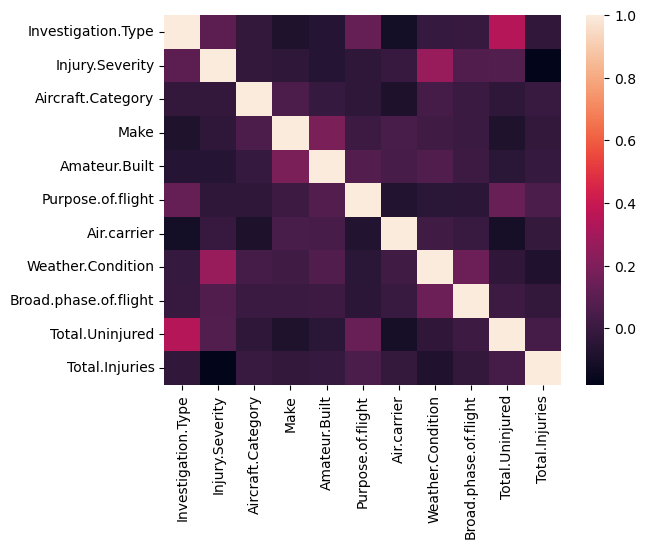

In [339]:
# data.corr()
sns.heatmap(data.corr())

In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [341]:

X = data.drop(columns='Injury.Severity')
y = data['Injury.Severity']


In [388]:

X_m = data_with_median.drop(columns='Injury.Severity')
y_m = data_with_median['Injury.Severity']


In [342]:
y.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [343]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [389]:
X_tr, X_te, y_tr, y_te = train_test_split(X_m, y_m, test_size=0.2, random_state=42)


In [374]:
from sklearn.metrics import classification_report
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3428
           1       0.96      0.97      0.96     14010

    accuracy                           0.94     17438
   macro avg       0.91      0.89      0.90     17438
weighted avg       0.94      0.94      0.94     17438



In [390]:
from sklearn.metrics import classification_report
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tr, y_tr)
y_pre = clf.predict(X_te)
print(classification_report(y_te, y_pre))


              precision    recall  f1-score   support

           0       0.63      0.60      0.61      3554
           1       0.90      0.91      0.90     13903

    accuracy                           0.85     17457
   macro avg       0.76      0.75      0.76     17457
weighted avg       0.84      0.85      0.84     17457



In [363]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores = learning_curve(clf, X, y, train_sizes=[0.3, 0.6, 0.9])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

20925 samples were used to train the model
The average train accuracy is 0.94
The average test accuracy is 0.83
41851 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.84
62776 samples were used to train the model
The average train accuracy is 0.94
The average test accuracy is 0.84


In [375]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for F1 score
f1_scorer = make_scorer(f1_score, average='macro')

# Calculate learning curve with F1 score
train_size_abs, train_scores, test_scores = learning_curve(
    clf, X, y, train_sizes=[0.3, 0.6, 0.9], scoring=f1_scorer
)

for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train F1 score is {cv_train_scores.mean():.2f}")
    print(f"The average test F1 score is {cv_test_scores.mean():.2f}")


20925 samples were used to train the model
The average train F1 score is 0.90
The average test F1 score is 0.72
41851 samples were used to train the model
The average train F1 score is 0.89
The average test F1 score is 0.72
62776 samples were used to train the model
The average train F1 score is 0.90
The average test F1 score is 0.74


/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


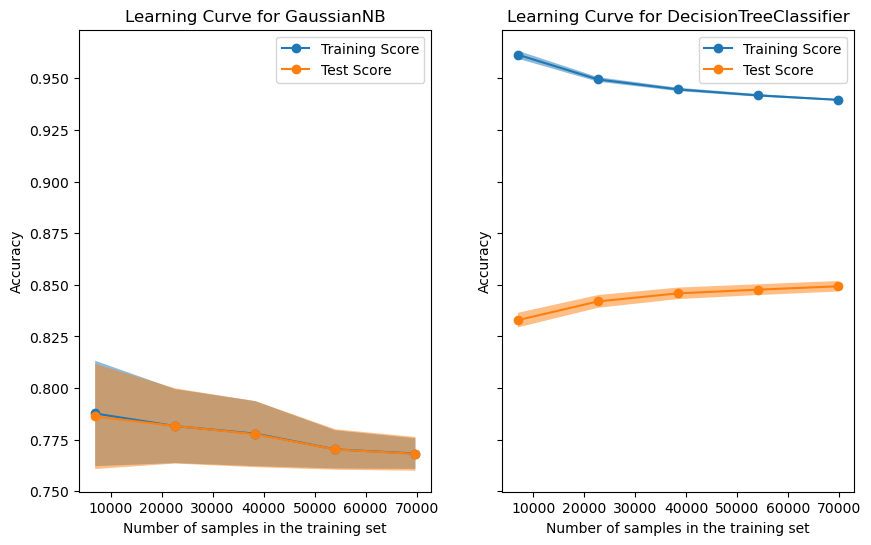

In [365]:


from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.naive_bayes import GaussianNB

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
naive_bayes = GaussianNB()
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, clf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [366]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [367]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [368]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [369]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8593875444431701


In [370]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      3428
           1       0.91      0.92      0.91     14010

    accuracy                           0.86     17438
   macro avg       0.78      0.76      0.77     17438
weighted avg       0.86      0.86      0.86     17438



In [372]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores = learning_curve(rf_classifier, X, y, train_sizes=[0.3, 0.6, 0.9])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

20925 samples were used to train the model
The average train accuracy is 0.94
The average test accuracy is 0.84
41851 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.85
62776 samples were used to train the model
The average train accuracy is 0.94
The average test accuracy is 0.85


/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/supriya/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarn

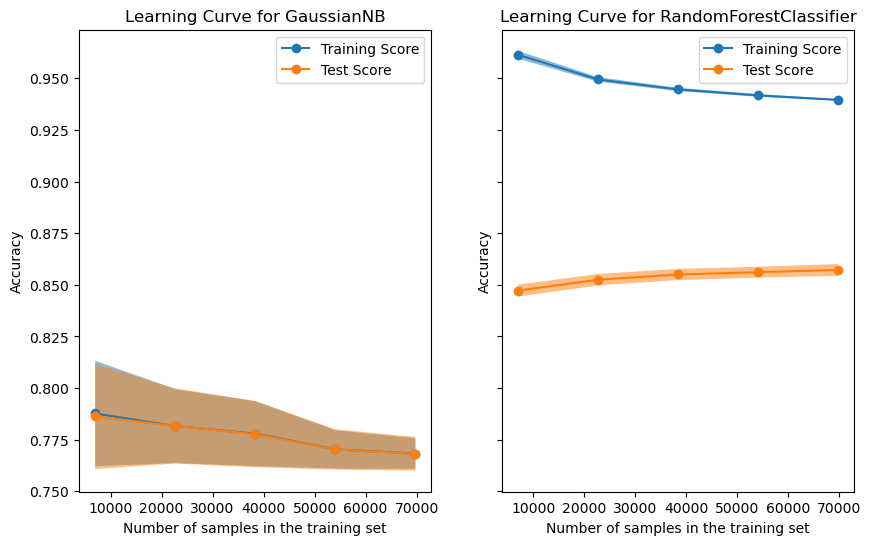

In [373]:


from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.naive_bayes import GaussianNB

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
naive_bayes = GaussianNB()
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, rf_classifier]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

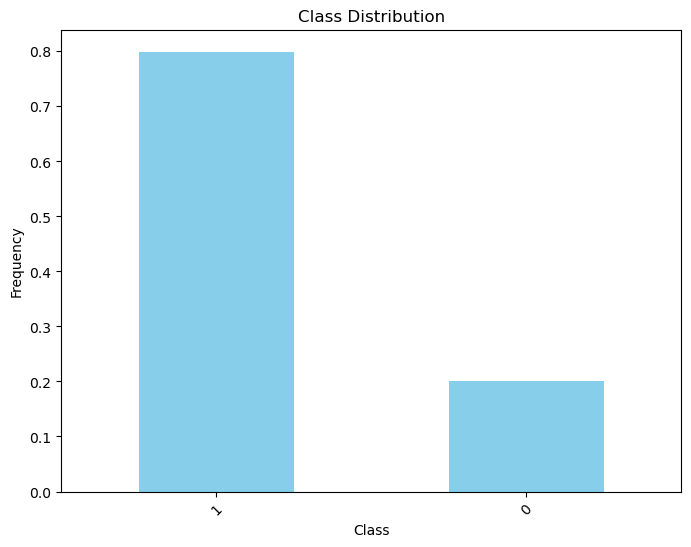

Class Distribution:
Injury.Severity
1    0.7993
0    0.2007
Name: proportion, dtype: float64


In [349]:

y_series = pd.Series(y)

# Calculate class distribution
class_distribution = y.value_counts(normalize=True)

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Print class distribution
print("Class Distribution:")
print(class_distribution)


In [350]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [351]:
feature_names = X.columns.tolist()
print(feature_names)

['Investigation.Type', 'Aircraft.Category', 'Make', 'Amateur.Built', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 'Total.Uninjured', 'Total.Injuries']


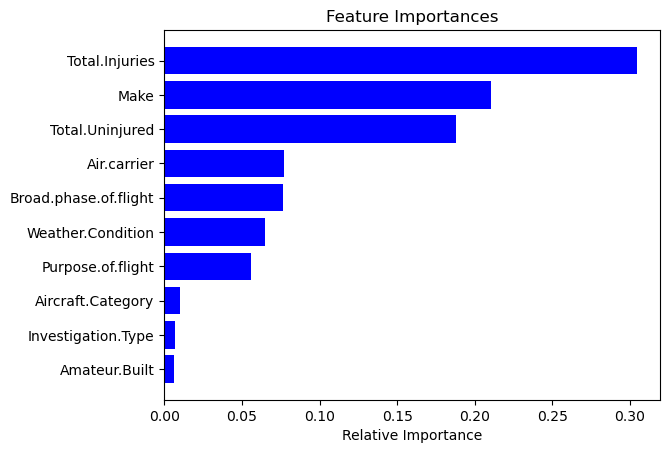

In [352]:
features = feature_names
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [353]:
feature_importances = rf_classifier.feature_importances_

print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")

Feature Importances:
Feature 1: 0.007050823395226066
Feature 2: 0.009892801214675779
Feature 3: 0.21057404878750702
Feature 4: 0.0059897288204015155
Feature 5: 0.05576301755190349
Feature 6: 0.07696736082316384
Feature 7: 0.06505002920064246
Feature 8: 0.07662160512051551
Feature 9: 0.1879004471190134
Feature 10: 0.3041901379669509


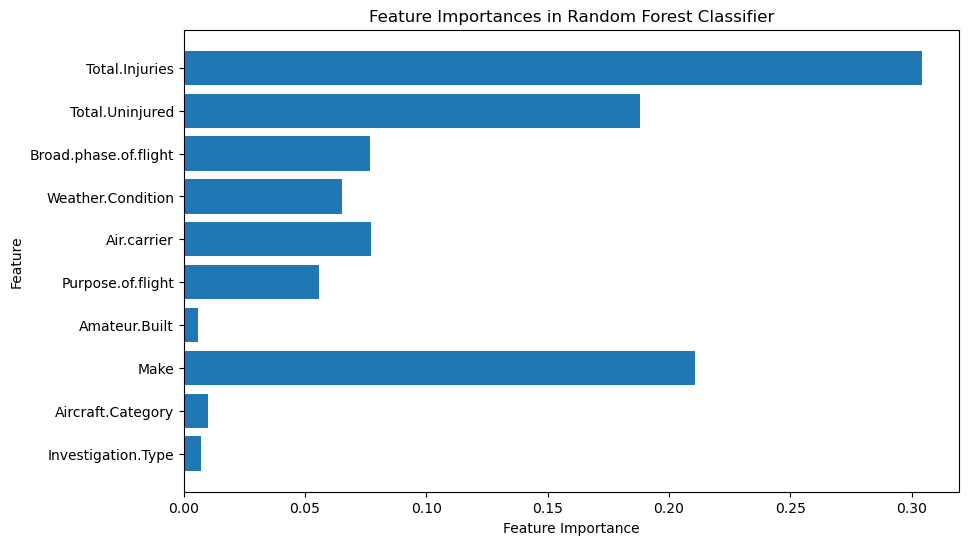

In [354]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

In [398]:

from sklearn.impute import KNNImputer
 
Before_imputation = df_cat
df2.isna().sum()
# print("Data Before performing imputation\n",Before_imputation)
 
# imputer = KNNImputer(n_neighbors=2)
# After_imputation = imputer.fit_transform(Before_imputation)
# print("\n\nAfter performing imputation\n",After_imputation)

Model              92
Total.Uninjured     0
Total.Injuries      0
dtype: int64

# Rough

In [355]:
df['Country'].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

In [356]:
print(data['Air.carrier'].unique())

[9080, 788, 9835, 7039, 4201, ..., 5596, 4524, 5597, 4794, 4370]
Length: 12692
Categories (12720, int64): [0, 1, 2, 3, ..., 12716, 12717, 12718, 12719]


In [357]:
data.columns

Index(['Investigation.Type', 'Injury.Severity', 'Aircraft.Category', 'Make',
       'Amateur.Built', 'Purpose.of.flight', 'Air.carrier',
       'Weather.Condition', 'Broad.phase.of.flight', 'Total.Uninjured',
       'Total.Injuries'],
      dtype='object')

In [358]:
data_filtered.head()

NameError: name 'data_filtered' is not defined

In [ ]:
test_df = data[['Investigation.Type', 'Location', 'Country',   'Aircraft.damage', 'Aircraft.Category', 'Make', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries','Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight']]

In [ ]:
test_df.head()

,Investigation.Type,Location,Country,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,"MOOSE CREEK, ID",United States,Destroyed,NaN,Stinson,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,"BRIDGEPORT, CA",United States,Destroyed,NaN,Piper,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,"Saltville, VA",United States,Destroyed,NaN,Cessna,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,"EUREKA, CA",United States,Destroyed,NaN,Rockwell,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,"Canton, OH",United States,Destroyed,NaN,Cessna,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [ ]:
test_df.isna().sum()

Investigation.Type            0
Location                     52
Country                     226
Aircraft.damage            3010
Aircraft.Category         56499
Make                         63
Amateur.Built               102
Number.of.Engines          5749
Engine.Type                5910
Purpose.of.flight          5789
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          3978
Broad.phase.of.flight     25558
dtype: int64

In [ ]:
unique = test_df['Investigation.Type'].unique()
unique_num = len(unique)
print(unique_num)

2


In [ ]:
categorical_cols = []

for col in test_df.columns:
    unique_values = test_df[col].unique()
    if len(unique_values)<20:
        categorical_cols.append(col)
print(categorical_cols)


['Investigation.Type', 'Aircraft.damage', 'Aircraft.Category', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Weather.Condition', 'Broad.phase.of.flight']


In [ ]:
test_df[categorical_cols]

,Investigation.Type,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight
0,Accident,Destroyed,NaN,N,1.0,Reciprocating,UNK,Cruise
1,Accident,Destroyed,NaN,N,1.0,Reciprocating,UNK,Unknown
2,Accident,Destroyed,NaN,N,1.0,Reciprocating,IMC,Cruise
3,Accident,Destroyed,NaN,N,1.0,Reciprocating,IMC,Cruise
4,Accident,Destroyed,NaN,N,NaN,NaN,VMC,Approach
...,...,...,...,...,...,...,...,...
87277,Accident,Destroyed,Airplane,N,1.0,NaN,NaN,NaN
87278,Accident,NaN,NaN,N,NaN,NaN,NaN,NaN
87279,Accident,NaN,NaN,N,NaN,NaN,NaN,NaN
87280,Accident,NaN,NaN,N,NaN,NaN,NaN,NaN


In [ ]:
for col in categorical_cols:
    print(f'Unique values in {col}',test_df[col].unique())
    print(f'number of Null values in {col} ', test_df[col].isna().sum())
    print('\n')

Unique values in Investigation.Type ['Accident' 'Incident']
number of Null values in Investigation.Type  0


Unique values in Aircraft.damage ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
number of Null values in Aircraft.damage  3010


Unique values in Aircraft.Category [nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket']
number of Null values in Aircraft.Category  56499


Unique values in Amateur.Built ['N' 'Y' nan]
number of Null values in Amateur.Built  102


Unique values in Number.of.Engines [ 1. nan  2.  0.  3.  4.  8.]
number of Null values in Number.of.Engines  5749


Unique values in Engine.Type ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR']
number of Null values in Engine.Type  5910


Unique values in Weather.Condition ['UNK' 'IMC' 'VMC' nan 'Unk']
number of Null values in Weather.Condit

In [ ]:
test_df['Amateur.Built'] = test_df['Amateur.Built'].replace({'Yes': 'Y', 'No': 'N'})


/tmp/ipykernel_8643/914295451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Amateur.Built'] = test_df['Amateur.Built'].replace({'Yes': 'Y', 'No': 'N'})


In [ ]:
test_df.shape

(87282, 16)

In [ ]:
for col in categorical_cols:
    print(f'Unique values in {col}',test_df[col].unique())
    print(f'number of Null values in {col} ', test_df[col].isna().sum())
    print('\n')

Unique values in Investigation.Type ['Accident' 'Incident']
number of Null values in Investigation.Type  0


Unique values in Aircraft.damage ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
number of Null values in Aircraft.damage  3010


Unique values in Aircraft.Category [nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket']
number of Null values in Aircraft.Category  56499


Unique values in Amateur.Built ['N' 'Y' nan]
number of Null values in Amateur.Built  102


Unique values in Number.of.Engines [ 1. nan  2.  0.  3.  4.  8.]
number of Null values in Number.of.Engines  5749


Unique values in Engine.Type ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR']
number of Null values in Engine.Type  5910


Unique values in Weather.Condition ['UNK' 'IMC' 'VMC' nan 'Unk']
number of Null values in Weather.Condit

In [ ]:
def impute_null_with_mode(df):
    for column in df.columns:
        mode_val = df[column].mode()[0]  # Calculate the mode for each column
        df[column].fillna(mode_val, inplace=True)  # Fill null values with the mode
    return df

In [ ]:
imputed_df = impute_null_with_mode(test_df[categorical_cols])

/tmp/ipykernel_8643/1529948284.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_val, inplace=True)  # Fill null values with the mode
/tmp/ipykernel_8643/1529948284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mode_val, inplace=True)  # Fill null values with the mode


In [ ]:
imputed_df.isna().sum()

Investigation.Type    0
Aircraft.damage       0
Amateur.Built         0
Number.of.Engines     0
Weather.Condition     0
dtype: int64

In [ ]:
numerical_cols = test_df.drop(columns=categorical_cols)

In [ ]:
numerical_cols.head()

,Location,Country,Aircraft.Category,Make,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
0,"MOOSE CREEK, ID",United States,NaN,Stinson,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise
1,"BRIDGEPORT, CA",United States,NaN,Piper,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown
2,"Saltville, VA",United States,NaN,Cessna,Reciprocating,Personal,3.0,NaN,NaN,NaN,Cruise
3,"EUREKA, CA",United States,NaN,Rockwell,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise
4,"Canton, OH",United States,NaN,Cessna,NaN,Personal,1.0,2.0,NaN,0.0,Approach


In [ ]:
numerical_cols.isna().sum()

Location                     52
Country                     226
Aircraft.Category         56499
Make                         63
Engine.Type                5910
Purpose.of.flight          5789
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Broad.phase.of.flight     25558
dtype: int64

In [ ]:
numerical_cols['Aircraft.Category'].unique()



array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket'], dtype=object)

In [ ]:
to_append_in_categorical = ['Aircraft.Category', 'Engine.Type', 'Purpose.of.flight', 'Broad.phase.of.flight']

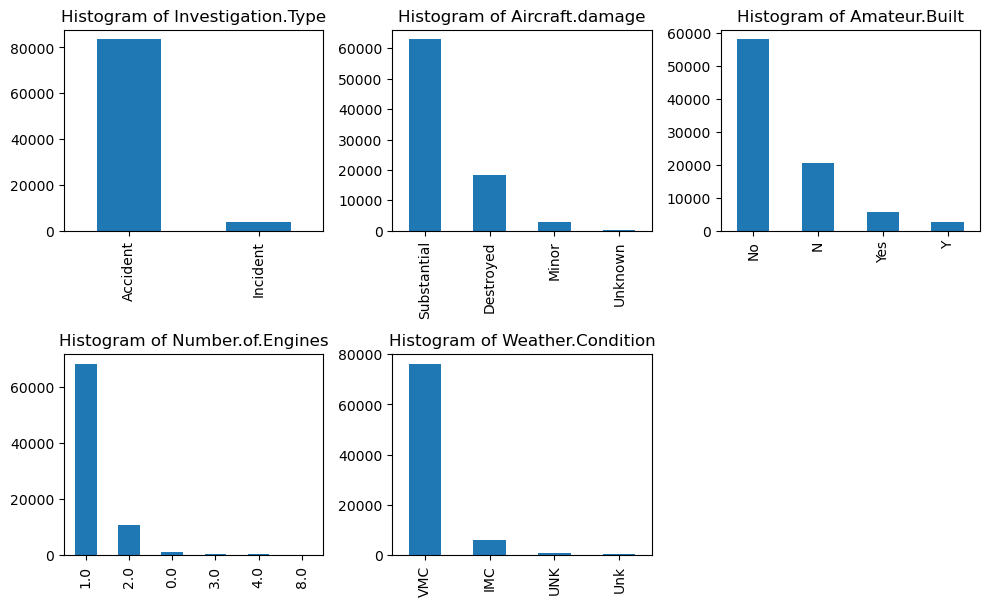

In [ ]:
columns_per_row = 3

num_cols = 5
num_rows = 3

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(10, 3 * num_rows))
for i, col in enumerate(categorical_cols):
    ax = axes[i // columns_per_row, i % columns_per_row]
    data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(num_cols, num_rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])

    
plt.tight_layout()
plt.show()